# K-Means

### Agenda:

1. KMeans
    - Pseudo Code 
2. Stoks Data set
    - Load data
    - Scale of data - Normalize
3. Build KMeans 
    - Check error term for each K in range of x
    - Plot and check for elbow
    - Disply Clusters with company name
4. Appendix
    - Plot a graph for set of companies and analyze pattern
5. Tuning


**K-means** is a popularly used **unsupervised** machine learning algorithm for cluster analysis. K-Means is a non-deterministic and iterative method. The algorithm operates on a given data set through pre-defined number of clusters, k. The output of K Means algorithm is k clusters with input data partitioned among the clusters.

K Means Clustering algorithm is used by most of the search engines like Yahoo, Google to cluster web pages by similarity and identify the ‘relevance rate’ of search results. This helps search engines reduce the computational time for the users.

## Pseudo code:
- Randomly choose K examples as intial centroids
- while true:
	 - create K clusters by assigning each example to closest centroids
	 - Compute K new centroids by averaging example in each cluster
	 - if centroids don't change
		 - break

Chosing K is triky. We can choose K as best of by operating KMeans in a range of values

### Clustering stocks Data

We'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day).  We have a NumPy array `movements` of daily price movements from 2010 to 2013, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others.  To account for this, include a `Normalizer` at the beginning.  The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

**Normalizer vs StandardScaler**
Note that `Normalizer()` is different to `StandardScaler()`. While `StandardScaler()` standardizes **features**  by removing the mean and scaling to unit variance, where as `Normalizer()` rescales **each sample** - here, each company's stock price - independently of the other.

This dataset was obtained from the Yahoo! Finance API.

**Step 1:** Load the data 

In [1]:
your_local_path="C:/Users/s.mudalapuram/Documents/PythonMe/data/"

In [2]:
import pandas as pd

fn = your_local_path+'company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)


**Step 2:** Inspect the first few rows of the DataFrame `stocks_df` by calling its `head()` function.

In [3]:
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [4]:
stocks_df.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


**Step 3:** Extract the NumPy array `movements` from the DataFrame and the list of company names (_written for you_)

In [5]:
companies = list(stocks_df.index)
movements = stocks_df.values


**Step 4:** Make the necessary imports:

- `Normalizer` from `sklearn.preprocessing`.
- `KMeans` from `sklearn.cluster`.
- `make_pipeline` from `sklearn.pipeline`.

In [6]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans


**Step 3:** Create an instance of `Normalizer` called `normalizer`.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scld = Normalizer()
arr_scld = scld.fit_transform(stocks_df)
df_scld = pd.DataFrame(arr_scld, columns=stocks_df.columns)
df_scld.head()


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.001667,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020
1,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.037366,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806
2,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.019834,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156
3,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.032231,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595
4,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.053043,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541


In [8]:
df_scld.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.019058,0.006312,0.000630,0.008985,0.013988,-0.003763,0.003154,0.014999,0.011125,-0.023272,...,0.023372,0.039079,0.012262,-0.003902,0.010560,-0.000093,0.001207,0.005747,0.013558,0.013013
std,0.029663,0.026387,0.024068,0.031485,0.022541,0.026291,0.028238,0.020361,0.025086,0.023275,...,0.028440,0.029394,0.031121,0.029678,0.031763,0.043953,0.036643,0.029733,0.027686,0.028953
min,-0.093285,-0.042849,-0.076951,-0.066895,-0.029658,-0.051388,-0.089504,-0.033751,-0.055975,-0.079213,...,-0.090966,-0.018364,-0.033487,-0.132207,-0.086750,-0.074120,-0.192058,-0.059550,-0.030029,-0.102020
25%,0.002430,-0.011077,-0.013759,-0.008433,-0.002362,-0.018580,-0.014310,0.001206,-0.003773,-0.035189,...,0.005121,0.020712,-0.004329,-0.018426,-0.002539,-0.023016,-0.017505,-0.012794,-0.006795,-0.003969
50%,0.017661,0.000643,-0.000602,0.007894,0.009476,-0.007362,0.003353,0.013330,0.010571,-0.021445,...,0.028338,0.033181,0.003037,0.000000,0.012190,-0.006401,0.002063,-0.000519,0.004233,0.010900
75%,0.036287,0.016366,0.017834,0.027802,0.030580,0.007766,0.025252,0.027603,0.026941,-0.007862,...,0.042096,0.065572,0.024872,0.010789,0.030823,0.007578,0.020731,0.017854,0.030382,0.023201
max,0.098275,0.074839,0.052703,0.112810,0.060058,0.082887,0.063844,0.071277,0.067208,0.031842,...,0.080407,0.109404,0.152285,0.049943,0.082647,0.146723,0.079898,0.087687,0.096387,0.096255


In [9]:
df_scld.shape

(60, 963)

**Step 4:** Create an instance of `KMeans` called 'clusters' with `14` clusters.

In [10]:
#let's build clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,15)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(df_scld)
    error.append(clusters.inertia_/100)
    
df=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})
df
#print (clusters)

,Cluster_Numbers,Error_Term
0,2,0.333538
1,3,0.321695
2,4,0.311557
3,5,0.301375
4,6,0.288125
5,7,0.279410
6,8,0.270338
7,9,0.261063
8,10,0.255122
9,11,0.244309


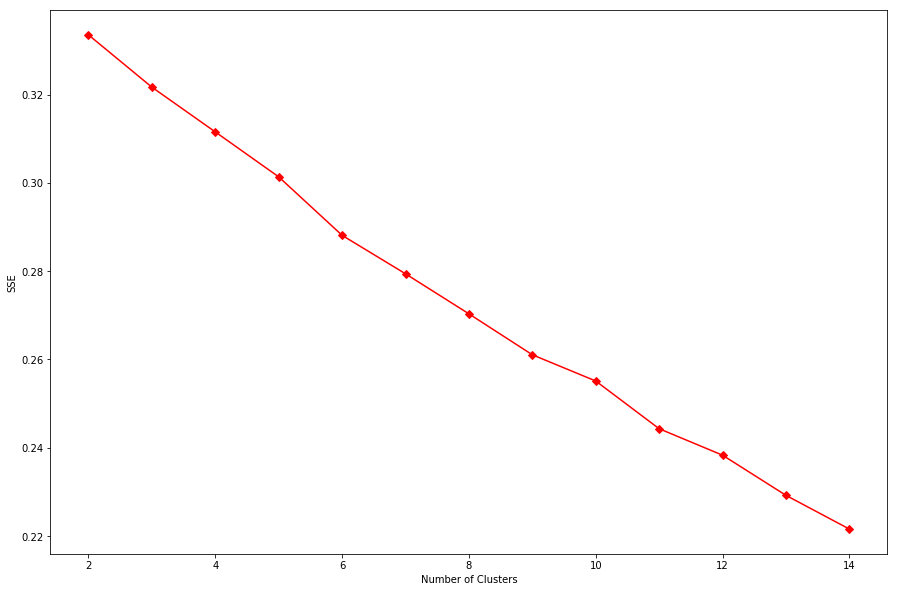

In [11]:
#Find the right number of clusters
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [12]:
#Build 5 clusters
clusters = KMeans(14)
clusters.fit(df_scld)
clusters.labels_

array([10,  5, 11,  2,  0,  5,  6,  4,  1,  3,  1,  6,  1,  1,  6,  4,  6,
       10,  5,  6,  6,  4,  6,  6, 13,  3,  5,  3,  3,  0,  2,  7,  1,  6,
        4,  6,  0,  6,  3,  1,  3,  3,  6,  6,  1,  4,  6,  6,  4,  6, 13,
       13,  6,  1,  8,  5, 12,  1,  4,  9])

In [13]:
labels = clusters.predict(movements)
labels

array([10,  5, 11,  2,  0,  5,  6,  4,  1,  3,  1,  6,  1,  1,  6,  4,  5,
       10,  5,  6,  6,  4,  6,  6, 13,  3,  5,  3,  3,  0,  2,  7,  1,  6,
        4,  6,  0,  6,  3,  1,  3,  3,  6,  6,  1,  4,  6,  6,  4,  6, 13,
       13,  6,  1,  8,  5, 12,  1,  4,  9])

In [14]:
companies = stocks_df.index

In [15]:
dff = pd.DataFrame({'labels': labels, 'companies': companies})
dff.sort_values('labels')

,labels,companies
29,0,Lookheed Martin
4,0,Boeing
36,0,Northrop Grumman
32,1,3M
13,1,DuPont de Nemours
12,1,Chevron
10,1,ConocoPhillips
8,1,Caterpillar
53,1,Valero Energy
57,1,Exxon


In [16]:
stocks_df['Cluster'] = clusters.labels_
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29,Cluster
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,10
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000,5
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021,11
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001,2
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998,0


**Using k-means, you've discovered which companies stock prices move together on the stock exchange.**

### Appendix

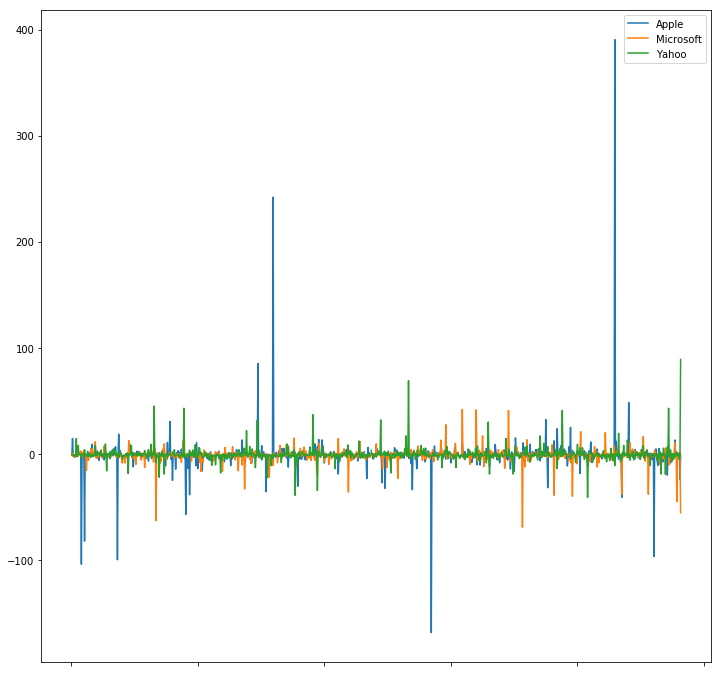

In [37]:
#Analyze a cluster
#three_stocks = stocks_test['Unilever','Walgreen','Xerox']
stocks_df.T.head()
stock1 = stocks_df.T['Apple']
stock2 = stocks_df.T['Microsoft']
stock3 = stocks_df.T['Yahoo']
tech_stocks = pd.concat([stock1, stock2, stock3], axis=1)
tech_stocks.head()
tech_stocks.pct_change().plot(figsize=(12,12))

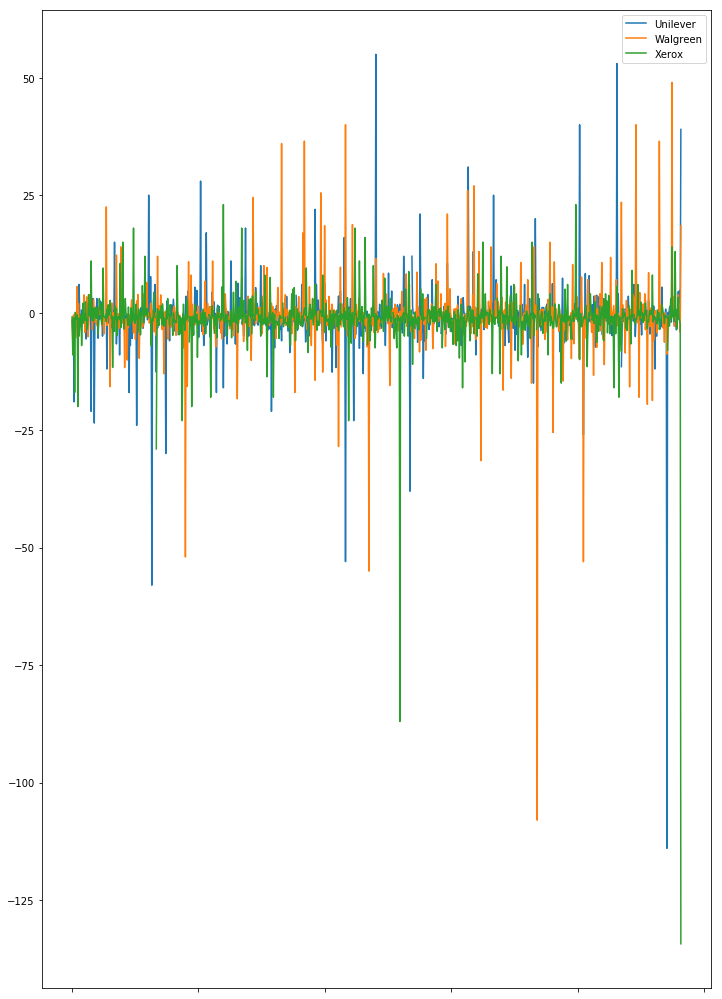

In [34]:
#Analyze a cluster
#stocks_test = stocks_df.T[['Unilever','Walgreen','Xerox']]
#stocks_test.T.head()
stock1 = stocks_df.T['Unilever']
stock2 = stocks_df.T['Walgreen']
stock3 = stocks_df.T['Xerox']
tech_stocks = pd.concat([stock1, stock2, stock3], axis=1)
tech_stocks.head()
tech_stocks.pct_change().plot(figsize=(12,18))

### Tuning:
Choosing poorly the random initial centroids will take longer to converge or get stuck on local optima which may result in bad clustering. in the picture above, the blue and red stars are unlucky centroids.

**Two solutions:**

- Distribute them over the space.
- Try different sets of random centroids, and choose the best set.